In [ ]:
!pip install ipywidgets==7.7.1

In [53]:
import numpy as np
from numpy.random import seed, randint
import ipywidgets as widgets 
from ipywidgets import interact, interactive_output, HBox, VBox, Layout
from IPython.display import display, clear_output, SVG, HTML
import graphviz as gv 
from graphviz import Digraph
import pydot

# Clase TreeNode

In [56]:
class TreeNode:
  def __init__(self, key):
    self.key = key
    self.parent = None
    self.left = None
    self.right = None
    self.pos = [0, 0] 
    self.col = "black" # Color
    self.h = 0 # Height
  def spos(self):
    ''' Position of a node for neato '''
    return str(self.pos[0]) + "," + str(self.pos[1]) + "!"
  def to_string(self):
    return str(self.key)
  def print(self):        
    print("TreeNode: %d" % (self.key))

In [54]:
n10 = TreeNode(10)
n5 = TreeNode(5)
n14 = TreeNode(14)
# Crear árbol vinculando los nodos del árbol
n5.parent = n10; n14.parent = n10
n10.left = n5 # hijo izquierdo
n10.right = n14 # hijo derecho
print([n10.to_string(), n10.left.to_string(), n10.right.to_string()])

['10', '5', '14']


# Binary search tree (BST)

In [55]:
class BST():
    def __init__(self):
        self.root = None 
        self.list = [] 

    def insert(self, k):
        ''' Insert a key '''
        newNode = TreeNode(k)
        # Si el árbol está vacío, el nuevo nodo es la raíz
        if self.root == None:
            self.root = newNode
        else:        
            x = self.root
            # Buscar nodo primario
            while x != None:
                p = x
                if newNode.key < x.key:
                    x = x.left
                elif newNode.key >= x.key:
                    x = x.right
            # Establecer padre, hijo izquierdo y derecho para newNode
            newNode.parent = p       
            if newNode.key < p.key:
                p.left = newNode
            else: 
                p.right = newNode
    def insert_keys(self, keys): 

        for k in keys:
            self.insert(k)
        
    def search(self, x, k):

        if (x == None or x.key == k):
            return x
        if (k < x.key):
            return self.search(x.left, k)
        else: 
            return self.search(x.right, k)
    def find(self, k):  
        return self.search(self.root, k)   
    
    def transplant(self, u, v):

        if (u.parent == None):
            self.root = u
        elif u == u.parent.left:
            u.parent.left = v
        else:
            u.parent.right = v
        if v != None:
            v.parent = u.parent
            
    def tree_minimum(self, x):
   
        while (x.left != None):
            x = x.left
        return x;

    def tree_max(self, x):

        while (x.right != None):
            x = x.right
        return x;

    def delete(self, k):
        '''Eliminar nodo con la clave k del árbol '''
        z = self.search(self.root, k)
        if z == None:
            return
        if z.left == None: # case 1: z has no left child
            self.transplant(z, z.right)
        elif z.right == None: # case 2: z has no right child
            self.transplant(z, z.left)
        else: 
            y = self.tree_minimum(z.right) # determine smallest value in z.right
            if (y.parent != z):
                self.transplant(y, y.right)
                y.right = z.right
                y.right.parent = y
            self.transplant(z, y)
            y.left = z.left
            y.left.parent = y
            if (z == self.root):
                self.root = y
                       
    def rotate_left(self, x):
      ''' Rotate left on node x'''
      y = x.right # set y to be right child
      # Gire el subárbol izquierdo de Y al subárbol derecho de X
      x.right = y.left
      if y.left != None:
          y.left.parent = x
      y.parent = x.parent # link x's parent to y
      if x.parent == None: # Case 1: x is root
          self.root = y
      elif x == x.parent.left: # Case 2: x is left child
          x.parent.left = y
      else: # Case 3: x is right child
          x.parent.right = y
      y.left = x
      x.parent = y


    def rotate_right(self, x):
      y = x.left # set y to be left child
      # turn y's left subtree to x's right subtree
      x.left = y.right
      if y.right != None:
          y.right.parent = x
      y.parent = x.parent # link x's parent to y
      if x.parent == None: # Case 1: x is root
          self.root = y
      elif x == x.parent.right: # Case 2: x is right child
          x.parent.right = y
      else: # Case 3: x is left child
          x.parent.left = y
      y.right = x
      x.parent = y
        

    def height(self, x):
        if (x == None):
            return 0
        else: 
            return 1 + np.maximum(self.height(x.left),  self.height(x.right))
    
    def inorder_traversal(self, x):
        '''Inorder traversal of the tree: returns elements sorted by key '''
        if (x != None):
            if (x == self.root):
                self.list = []
            self.inorder_traversal(x.left)
            self.list.append(x.to_string())
            self.inorder_traversal(x.right)

    def postorder_traversal(self, x):
        '''Postorder traversal of the tree: left child, right child, root '''
        if (x != None):
            if (x == self.root):
                self.list = []
            self.postorder_traversal(x.left)
            self.postorder_traversal(x.right)
            self.list.append(x.to_string())
        

    def visualize(self, node = None):   
        ''' Visualize the tree using graphviz '''
        tree = self.root              
        # Recursively add nodes and edges
        def add_nodes_edges(tree, dot=None):
            col = "black"           
            # Create Graphviz Digraph 
            if dot is None:
                dot = Digraph()
                dot.node(name=str(tree), label=str(tree.key), 
                         color = col, shape="circle", fixedsize="True", width="0.4")                      
            # Add nodes recursively
            if tree.left:            
                if (node != None and tree.left.key == node.key):                   
                    col = "green"  
                dot.node(name=str(tree.left), label=str(tree.left.key), 
                         color = col, shape="circle", fixedsize="True", width="0.4")
                dot.edge(str(tree), str(tree.left))
                dot = add_nodes_edges(tree.left, dot=dot)               
            if tree.right:
                if (node != None and tree.right.key == node.key): 
                    col = "red" 
                dot.node(name=str(tree.right), label=str(tree.right.key), 
                         color = col, shape="circle", fixedsize="True", width="0.4")
                dot.edge(str(tree), str(tree.right))
                dot = add_nodes_edges(tree.right, dot=dot)            
            return dot        
        return add_nodes_edges(tree)   

In [63]:
class BSTViz: 
  def __init__(self, bst):
      self.bst = bst
  def visualize(self):   
      ''' Visualize the tree using graphviz '''
      tree = self.bst.root # start with root of the tree 
      dot = Digraph()
      dot.engine = 'neato'
      # Place root node at position tree.pos 
      h = self.bst.height(tree)
      tree.pos = [0, h]          
      dot.node(name=str(tree), label=str(tree.key), color = tree.col, shape="circle", 
               fixedsize="True", width="0.4", pos=tree.spos())
      # Recursively place the other nodes and edges              
      def add_nodes(tree, dot):            
          if tree.left: # if left subtree: position node to left of parent            
              tree.left.pos[0] = tree.pos[0] - h/4 # x
              tree.left.pos[1] = tree.pos[1] - 0.6 # y       
              dot.node(name=str(tree.left), label=str(tree.left.key), color = tree.left.col, 
                       shape="circle", fixedsize="True", width="0.4", pos=tree.left.spos())
              dot.edge(str(tree), str(tree.left))
              dot = add_nodes(tree.left, dot=dot) 
          if tree.right: # if right subtree: position node to right of parent                    
              tree.right.pos[0] = tree.pos[0] + h/4 # x
              tree.right.pos[1] = tree.pos[1] - 0.6 # y                
              dot.node(name=str(tree.right), label=str(tree.right.key), color = tree.right.col, 
                       shape="circle", fixedsize="True", width="0.4", pos=tree.right.spos())
              dot.edge(str(tree), str(tree.right))
              dot = add_nodes(tree.right, dot=dot)                     
          return dot 
      display(add_nodes(tree, dot))  

Insertar 10, 30, 20 en BST


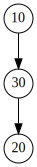

In [59]:
#Insertar nodos
bst = BST()
print("Insertar 10, 30, 20 en BST")
bst.insert_keys([10, 30, 20])
dot = bst.visualize()
display(dot)


Rotar el nodo 30


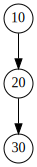

In [60]:
print("Rotar el nodo 30")
bst.rotate_right(bst.find(30))
dot = bst.visualize()
display(dot)


Girar a la izquierda en 10


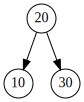

In [61]:
print("Girar a la izquierda en 10")
bst.rotate_left(bst.find(10))
dot = bst.visualize()
display(dot)

# AVLTree
La clase AVLTree se define como una subclase de la clase BST, por lo que hereda las variables y los métodos de la clase base y los extiende.

In [62]:
class AVLTree(BST): 
  def __init__(self):
    super().__init__()
  
  def insert(self, k):
    ''' Insert a key '''
    super().insert(k)
    p = super().find(k) 
    prevBalance = 0
    while (p != None):
        b = super().height(p.right) - super().height(p.left)
        if (b > 1 and prevBalance > 0): # Case 1
            super().rotate_left(p)
        elif (b < 1 and prevBalance < 0): # Case 2
            super().rotate_right(p)
        elif (b > 1 and prevBalance < 0): #  Case 3
            super().rotate_right(p.right)
            super().rotate_left(p)
        elif (b < -1 and prevBalance > 0): # Case 4             
            super().rotate_left(p.left)
            super().rotate_right(p)
        prevBalance = b
        p = p.parent

In [84]:
class AVLViz: 
  def __init__(self, bst):
      self.bst = bst
  def visualize(self):   
      ''' Visualize the tree using graphviz '''
      tree = self.bst.root # start with root of the tree 
      dot = Digraph()
      dot.engine = 'neato'
      # Place root node at position tree.pos 
      h = self.bst.height(tree)
      tree.pos = [0, h]          
      dot.node(name=str(tree), label=str(tree.key), color = tree.col, shape="circle", 
               fixedsize="True", width="0.4", pos=tree.spos())
      # Recursively place the other nodes and edges              
      def add_nodes(tree, dot):            
          if tree.left: # if left subtree: position node to left of parent            
              tree.left.pos[0] = tree.pos[0] - h/4 # x
              tree.left.pos[1] = tree.pos[1] - 0.6 # y       
              dot.node(name=str(tree.left), label=str(tree.left.key), color = tree.left.col, 
                       shape="circle", fixedsize="True", width="0.4", pos=tree.left.spos())
              dot.edge(str(tree), str(tree.left))
              dot = add_nodes(tree.left, dot=dot) 
          if tree.right: # if right subtree: position node to right of parent                    
              tree.right.pos[0] = tree.pos[0] + h/4 # x
              tree.right.pos[1] = tree.pos[1] - 0.6 # y                
              dot.node(name=str(tree.right), label=str(tree.right.key), color = tree.right.col, 
                       shape="circle", fixedsize="True", width="0.4", pos=tree.right.spos())
              dot.edge(str(tree), str(tree.right))
              dot = add_nodes(tree.right, dot=dot)                     
          return dot 
      display(add_nodes(tree, dot))  

# Insertar nodos en BST


Insertar 1, 2, 3, 4, 5,6,7,8,9,10


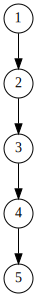

In [67]:
bts = BST()
print("Insertar 1, 2, 3, 4, 5,6,7,8,9,10")
bts.insert_keys([1, 2, 3, 4, 5])
dot = bts.visualize()
display(dot)

# Autobalanceado en AVL

Insertar 1, 2, 3, 4, 5,6,7,8,9,10


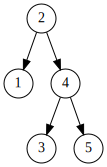

In [73]:
avl = AVLTree()
print("Insertar 1, 2, 3, 4, 5,6,7,8,9,10")
avl.insert_keys([1, 2, 3, 4, 5])
dot = avl.visualize()
display(dot)

# Animación en GraphViz

In [85]:
from numpy.random import seed, randint
from ipywidgets import interactive_output
from ipywidgets import HBox, VBox, Layout, Tab, Output, BoundedIntText, Button, HTML
from IPython.display import display, clear_output, SVG
from graphviz import Digraph
import pydot

# BST
tree = BST() 

# Output objects
out, out1, out2, out3 = Output(), Output(), Output(), Output() 
tab = Tab(children = [out1, out2], 
                  layout=Layout(width='100%', height='auto'))
tab.set_title(0, 'AVL Tree')
tab.set_title(1, 'B-Tree')

# Input field for keys
ui_key = BoundedIntText(value=20, min=0, max=100, 
                        step=2, description='Enter Key:', disabled=False)
# Buttons
btn_insert = Button(description='Insert', button_style='success')
def on_button_insert_clicked(b):
    with out:
        clear_output()
        print("Insert: %d" % (ui_key.value)) 
        tree.insert(ui_key.value)
        BSTViz(tree).visualize()      
btn_insert.on_click(on_button_insert_clicked)

btn_delete = Button(description='Delete', button_style='primary')
def on_button_delete_clicked(b):
    with out:
        clear_output()
        print("Delete: %d" % (ui_key.value)) 
        tree.delete(ui_key.value)
        BSTViz(tree).visualize()        
btn_delete.on_click(on_button_delete_clicked)

btn_clear = Button(description='Clear', button_style='danger')
def on_button_clear_clicked(b):
    with out:
        clear_output()
        tree.root = None 
btn_clear.on_click(on_button_clear_clicked)

btn_search = Button(description='Search', button_style='info')
def on_button_search_clicked(b):
    with out:
        clear_output()
        if (tree is None):
            print("No tree selected!")
        else:
            print("Search: %d" % (ui_key.value)) 
            foundnode = tree.find(ui_key.value)
            if (foundnode != None):
                print("Found: %d is in tree" % (ui_key.value)) 
                BSTViz(tree).visualize()  
            else:
                print("Not found: %d not in tree" % (ui_key.value)) 
                BSTViz(tree).visualize()  
            
btn_search.on_click(on_button_search_clicked)

btn_rnd = Button(description='Random', button_style='warning')
seed(1) # Set the seed for the random number generator
def on_button_rnd_clicked(b):
    with out:
        clear_output()
        tree.root = None
        keys = randint(1, 50, 7)
        for key in keys:
            tree.insert(key)
        BSTViz(tree).visualize()  
btn_rnd.on_click(on_button_rnd_clicked)

# Layout
layout_displ=Layout(height='350px', border='1px dotted blue', overflow ='auto')
layout_ctrl=Layout(height='50px')


# AVL tree
avl = AVLTree()
# Buttons
btn_insert_avl = Button(description='Insert', button_style='success')
def on_button_insert_avl_clicked(b):
    with out:
        clear_output()
        avl.insert(ui_key.value)
        AVLViz(avl).visualize()       
btn_insert_avl.on_click(on_button_insert_avl_clicked)

btn_delete_avl = Button(description='Delete', button_style='primary')
def on_button_delete_avl_clicked(b):
    with out:
        clear_output()
        avl.delete(ui_key.value)
        AVLViz(avl).visualize()        
btn_delete_avl.on_click(on_button_delete_avl_clicked)

btn_rnd_avl = Button(description='Random', button_style='warning')
seed(1) # Set the seed for the random number generator
def on_button_rnd_avl_clicked(b):
    with out:
        clear_output()
        avl.root = None
        keys = randint(1, 50, 7)    
        avl.insert_keys(keys)        
        AVLViz(avl).visualize()  
btn_rnd_avl.on_click(on_button_rnd_avl_clicked)

btn_clear_avl = Button(description='Clear', button_style='danger')
def on_button_clear_avl_clicked(b):
    with out:
        clear_output()
        avl.root = None 
btn_clear_avl.on_click(on_button_clear_avl_clicked)

with out1: 
    msgbox = HTML("<p></p>")
    displ = HBox([out], layout=layout_displ)
    ctrl = HBox([ui_key, btn_insert_avl, btn_delete_avl, btn_clear_avl], layout=layout_ctrl)
    display(VBox([displ, msgbox, ctrl]))
with out2:
    htm = HTML("<h1>TODO</h1><p>Insert your code here</p>")
    display(htm)  
display(tab)